In [1]:
%pip install torch
import torch
import pandas as pd
import numpy as np


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


/var/folders/kq/22rtshv9635518wrmfbx3l1r0000gn/T/ipykernel_30063/304007326.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = diabetes_df.drop('Outcome', axis=1).values
y = diabetes_df['Outcome'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=32,
                                                    stratify=y)

In [6]:
import torch.nn as nn
import torch.nn.functional as F 

In [7]:

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)

print(X_train)

tensor([[  4.0000, 146.0000,  85.0000,  ...,  28.9000,   0.1890,  27.0000],
        [  5.0000,  96.0000,  74.0000,  ...,  33.6000,   0.9970,  43.0000],
        [  6.0000, 107.0000,  88.0000,  ...,  36.8000,   0.7270,  31.0000],
        ...,
        [ 17.0000, 163.0000,  72.0000,  ...,  40.9000,   0.8170,  47.0000],
        [  0.0000, 167.0000,   0.0000,  ...,  32.3000,   0.8390,  30.0000],
        [  2.0000, 134.0000,  70.0000,  ...,  28.9000,   0.5420,  23.0000]])


In [8]:

class ANN_Model(nn.Module):
    def __init__(self, input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__() 
        self.layer_1_connection = nn.Linear(input_features,hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [9]:
torch.manual_seed(32)

ann = ANN_Model()

In [10]:

loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(ann.parameters(), lr=0.01)

In [11]:
final_loss=[]
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss}')

    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 

Epoch number: 1 with loss: 5.095461845397949
Epoch number: 11 with loss: 0.6893868446350098
Epoch number: 21 with loss: 0.6480377912521362
Epoch number: 31 with loss: 0.6270997524261475
Epoch number: 41 with loss: 0.6159247159957886
Epoch number: 51 with loss: 0.6067296862602234
Epoch number: 61 with loss: 0.6022639274597168
Epoch number: 71 with loss: 0.6114451289176941
Epoch number: 81 with loss: 0.6033308506011963
Epoch number: 91 with loss: 0.5931477546691895
Epoch number: 101 with loss: 0.5953351855278015
Epoch number: 111 with loss: 0.5873278975486755
Epoch number: 121 with loss: 0.5823612213134766
Epoch number: 131 with loss: 0.5815874338150024
Epoch number: 141 with loss: 0.5763397216796875
Epoch number: 151 with loss: 0.5709788203239441
Epoch number: 161 with loss: 0.5669021010398865
Epoch number: 171 with loss: 0.5651048421859741
Epoch number: 181 with loss: 0.5659459233283997
Epoch number: 191 with loss: 0.5618647933006287
Epoch number: 201 with loss: 0.5581466555595398
Epoc

In [12]:
y_pred = []

with torch.no_grad(): 
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax()) 

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (233).

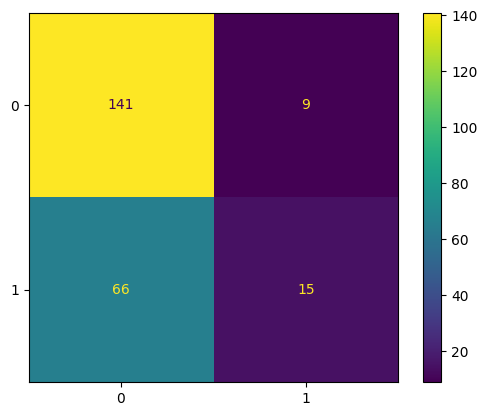

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
# It did not perform as well as the Adam Model. 

In [ ]:
def list_divisors(n: int) -> str:
    divisors = [i for i in range(1, n + 1) if n % i == 0]
    return f"There are {len(divisors)} divisors: {', '.join(map(str, divisors))}"

print(list_divisors(5))  
print(list_divisors(40))

There are 2 divisors: 1, 5
There are 8 divisors: 1, 2, 4, 5, 8, 10, 20, 40
